In [1]:
library(ggplot2)
library(igraph)
library(tidyverse)
library(reshape2)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  1.4.1     ✔ purrr   0.2.4
✔ tidyr   0.7.2     ✔ dplyr   0.7.4
✔ readr   1.1.1     ✔ stringr 1.2.0
✔ tibble  1.4.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::as_data_frame() masks tibble::as_data_frame(), igraph::as_data_frame()
✖ purrr::compose()       masks igraph::compose()
✖ tidyr::crossing()      masks igraph::crossing()
✖ dplyr::filter()        masks stats::filter()
✖ dplyr::groups()        masks igraph::groups()
✖ dplyr::lag()           masks stats::lag()
✖ purrr::simplify()      masks igraph::simplify()

Attaching package: ‘reshape2’

The following object is masked from ‘package:tidyr’:

    smiths



In [113]:
year <- read.csv("year1_logret.csv", header=T)

year <- year %>% remove_rownames %>% column_to_rownames(var="X")
year

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,⋯,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
A,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
AAL,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
AAP,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
AAPL,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ABBV,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ABC,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ABT,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ACN,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ADBE,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ADI,0,0,0,0,0,0,0,0,0,0,⋯,0,1,0,0,0,0,0,0,0,0


In [114]:
year[year[,] == 0] <- NA
year <- as.matrix(year)
year

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,⋯,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
A,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
AAL,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
AAP,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
AAPL,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ABBV,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ABC,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ABT,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ACN,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ADBE,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ADI,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,1,NA,NA,NA,NA,NA,NA,NA,NA


In [115]:
#use melt to reshape the matrix into triplets, na.omit to get rid of the NA rows
upperTriangle <- upper.tri(year, diag=F) #turn into a upper triangle
links.upperTriangle <- year #take a copy of the original corr-mat
links.upperTriangle[!upperTriangle] <- NA
links.upperTriangle[year] <- NA#set everything not in upper triangle to NA
links_filtered <- na.omit(melt(links.upperTriangle)) #use melt to reshape the matrix into triplets, na.omit to get rid of the NA rows
colnames(links_filtered)<-c("stock1", "stock2", "value")
links_filtered <- as.matrix(links_filtered)
links_filtered
dim(links_filtered)

,stock1,stock2,value
7515,AEE,AEP,1
11519,AFL,AJG,1
13502,AAL,ALK,1
15510,ADI,AMAT,1
17034,AME,AMG,1
17505,ABBV,AMGN,1
18034,AME,AMP,1
18035,AMG,AMP,1
20518,AET,ANTM,1
21024,AJG,AON,1


[1] 2096    3

In [116]:
#G <- graph_from_adjacency_matrix(links, weighted=T, mode="undirected", diag=F)
G <- graph_from_edgelist(links_filtered[,1:2], directed=F)
G

IGRAPH e344e92 UN-- 321 2096 -- 
+ attr: name (v/c)
+ edges from e344e92 (vertex names):
 [1] AEE --AEP  AFL --AJG  AAL --ALK  ADI --AMAT AME --AMG  ABBV--AMGN
 [7] AME --AMP  AMG --AMP  AET --ANTM AJG --AON  ALLE--AOS  APA --APC 
[13] ADI --APH  AIV --AVB  ADI --AVGO AEE --AWK  AEP --AWK  AMP --AXP 
[19] AIG --BAC  AME --BAC  AMG --BAC  AMP --BAC  AXP --BAC  AIG --BBT 
[25] AME --BBT  AMG --BBT  AMP --BBT  AXP --BBT  BAC --BBT  BAX --BDX 
[31] AME --BEN  AMG --BEN  AMP --BEN  BAC --BEN  BBT --BEN  AME --BK  
[37] AMG --BK   AMP --BK   AXP --BK   BAC --BK   BBT --BK   BEN --BK  
[43] AFL --BLK  AJG --BLK  AME --BLK  AMG --BLK  AMP --BLK  BLK --APD 
+ ... omitted several edges

In [117]:
# Save network graph as ong file
png(filename="R_year1_graph.png", width=1000, height=800)
plot.igraph(G, vertex.size=5, vertex.label.cex=0.7, vertex.label.dist=1)
dev.off()

pdf 
  2

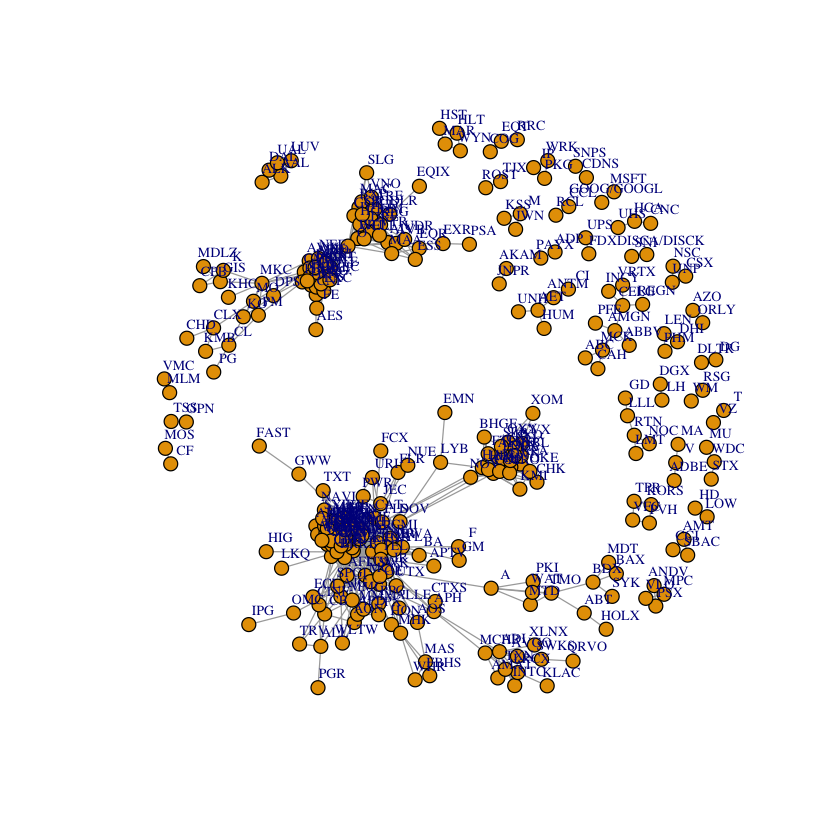

In [118]:
# Visualize network
plot.igraph(G, vertex.size=5, vertex.label.cex=0.7, vertex.label.dist=1)

In [ ]:
#Introduction, Literature review, Limitations on literature review, Methodology (formulas+graphs), 
#Results (networks+regression version 1), Assessment (models version 2), Conclusions and limitations and further work

# Do network visuals in R for final paper with color coding only